In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

# Plot style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)


D:\Anaconda\Lib\site-packages\pandas\core\computation\expressions.py:22: UserWarning: Pandas requires version '2.10.2' or newer of 'numexpr' (version '2.10.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [9]:
df = pd.read_csv("cleaned_features.csv")

display(df.head())
df.info()


,timestamp,city,co,humidity,ingested_at,no2,o3,pm10,pm2_5,precipitation,...,pm10_delta_3h,pm2_5_pm10_ratio,no2_o3_ratio,target_aqi_t_plus_24h,target_aqi_class_t_plus_24h,target_aqi_class_t_plus_48h,target_aqi_class_t_plus_72h,feature_generated_at,validation_done_at,rows_after_cleaning
0,2025-08-12 04:00:00,Karachi,74.42,74.0,2026-02-07 15:59:24.252,0.08,36.05,63.61,14.18,0.0,...,14.46,0.222921,0.002219,76.217677,2.0,2.0,2.0,2026-02-07 16:10:19.559,2026-02-07 16:18:08.624,4186
1,2025-08-12 09:00:00,Karachi,73.37,71.0,2026-02-07 15:59:24.253,0.05,36.42,62.40,13.33,0.3,...,-0.09,0.213622,0.001373,72.871818,2.0,2.0,2.0,2026-02-07 16:10:19.559,2026-02-07 16:18:08.624,4186
2,2025-08-12 10:00:00,Karachi,72.87,71.0,2026-02-07 15:59:24.253,0.05,36.19,62.63,13.44,0.2,...,0.70,0.214594,0.001382,72.084848,2.0,2.0,2.0,2026-02-07 16:10:19.559,2026-02-07 16:18:08.624,4186
3,2025-08-12 11:00:00,Karachi,72.93,73.0,2026-02-07 15:59:24.253,0.06,36.29,61.44,13.32,0.3,...,-0.55,0.216797,0.001653,71.401818,2.0,2.0,2.0,2026-02-07 16:10:19.559,2026-02-07 16:18:08.624,4186
4,2025-08-12 16:00:00,Karachi,72.94,82.0,2026-02-07 15:59:24.254,0.11,37.77,60.74,13.72,0.0,...,1.62,0.225881,0.002912,69.882323,2.0,2.0,2.0,2026-02-07 16:10:19.559,2026-02-07 16:18:08.624,4186


<class 'pandas.DataFrame'>
RangeIndex: 4186 entries, 0 to 4185
Columns: 109 entries, timestamp to rows_after_cleaning
dtypes: float64(102), int64(1), str(6)
memory usage: 4.0 MB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
co,4186.0,194.196734,128.965068,72.870000,92.67500,132.740000,275.952500,824.500000
humidity,4186.0,59.295031,23.326259,7.000000,39.00000,61.000000,81.000000,99.000000
no2,4186.0,0.701947,0.887616,0.020000,0.08000,0.190000,1.227500,6.950000
o3,4186.0,97.173029,42.705335,30.140000,47.78250,105.730000,132.007500,208.980000
pm10,4186.0,84.997496,63.116088,0.000000,36.62750,73.460000,114.840000,414.470000
...,...,...,...,...,...,...,...,...
target_aqi_t_plus_24h,4186.0,159.523048,83.115991,18.291667,62.08809,199.677632,228.380346,310.157663
target_aqi_class_t_plus_24h,4186.0,3.609890,1.617552,1.000000,2.00000,4.000000,5.000000,5.000000
target_aqi_class_t_plus_48h,4186.0,3.627090,1.616292,1.000000,2.00000,5.000000,5.000000,5.000000
target_aqi_class_t_plus_72h,4186.0,3.643096,1.614213,1.000000,2.00000,5.000000,5.000000,5.000000


In [11]:
df.shape

(4186, 109)

In [6]:
targets = [
    'target_aqi_t_plus_24h',              # numeric
    'target_aqi_class_t_plus_24h',        # class
    'target_aqi_class_t_plus_48h',        # class
    'target_aqi_class_t_plus_72h'         # class
]


## AQI Distribution

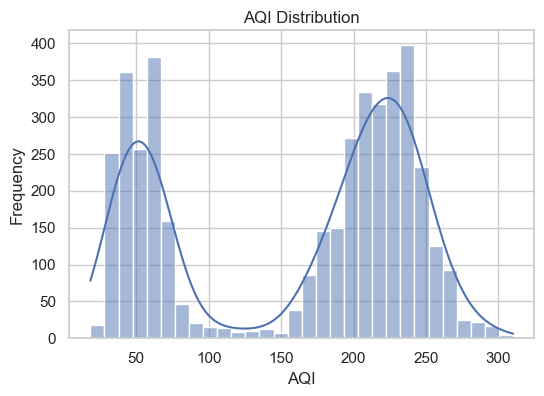

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.histplot(df["aqi"], bins=30, kde=True)
plt.title("AQI Distribution")
plt.xlabel("AQI")
plt.ylabel("Frequency")
plt.show()


## Univariate Analysis

### Pollution Distribution

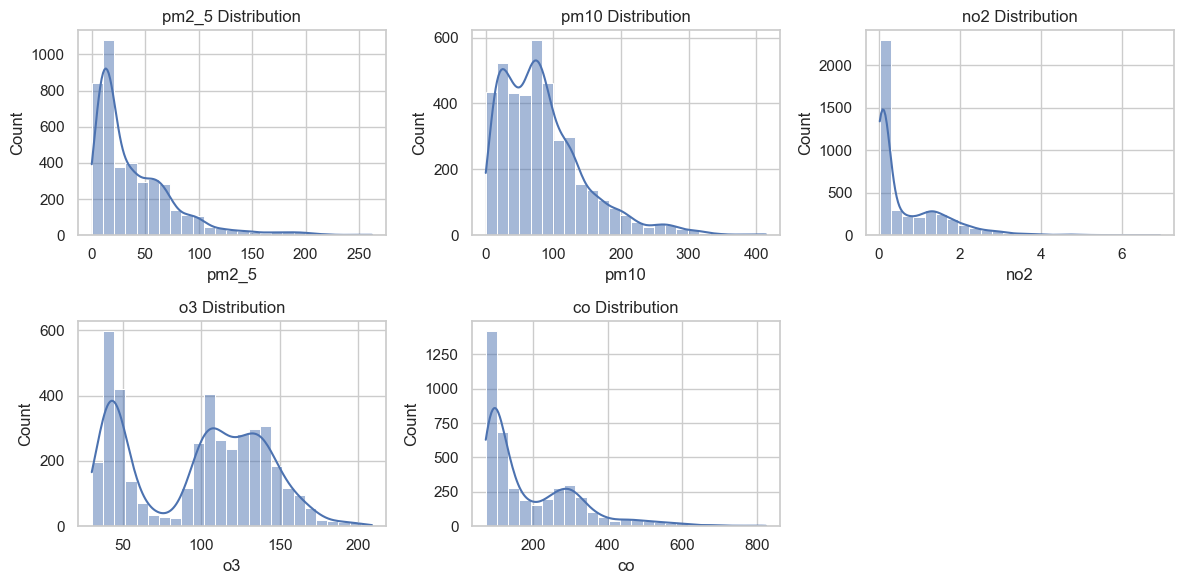

In [18]:
pollutants = ["pm2_5", "pm10", "no2", "o3", "co"]

plt.figure(figsize=(12,6))
for i, col in enumerate(pollutants, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], bins=25, kde=True)
    plt.title(f"{col} Distribution")

plt.tight_layout()
plt.show()


In [ ]:
### Weather Distribution

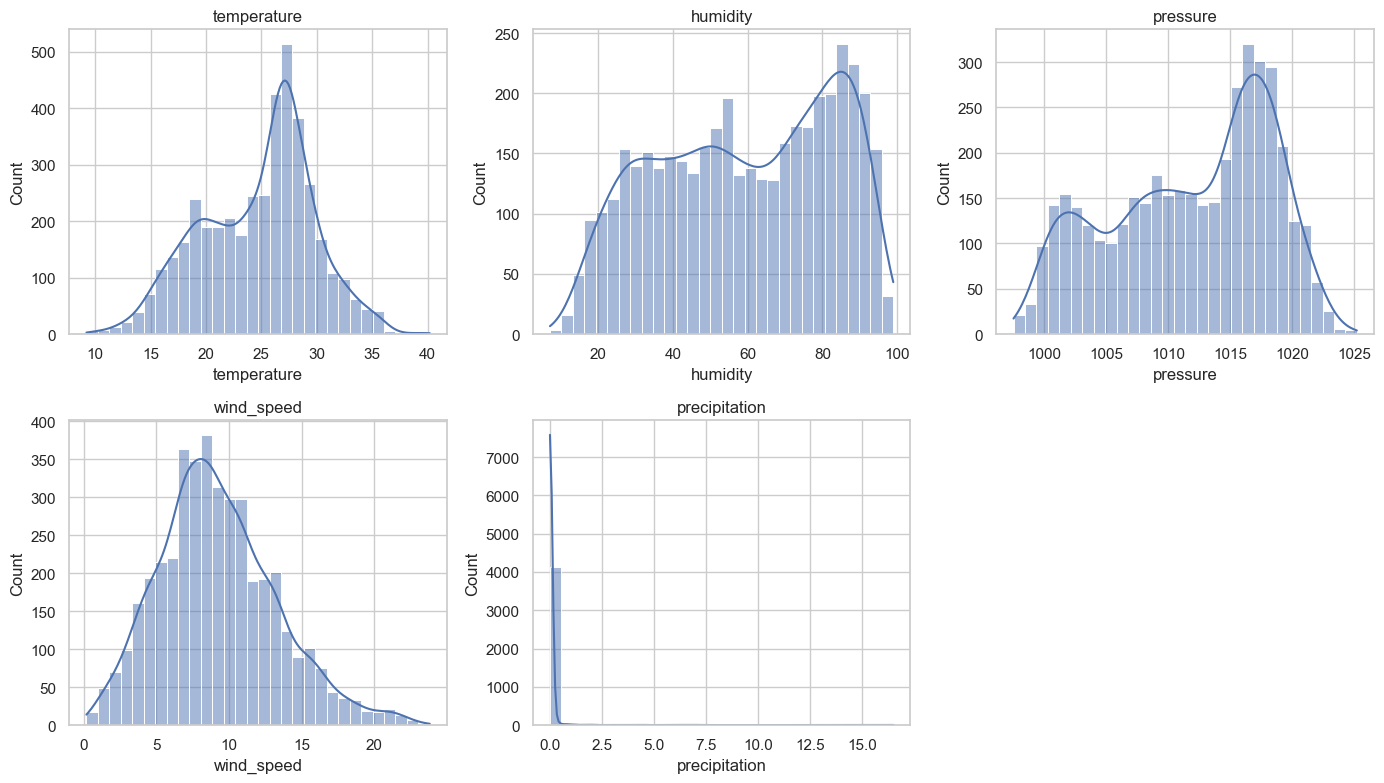

In [30]:
weather = ["temperature","humidity","pressure","wind_speed","precipitation"]

plt.figure(figsize=(14,8))

for i, col in enumerate(weather,1):
    plt.subplot(2,3,i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()


## Time Series Visualization

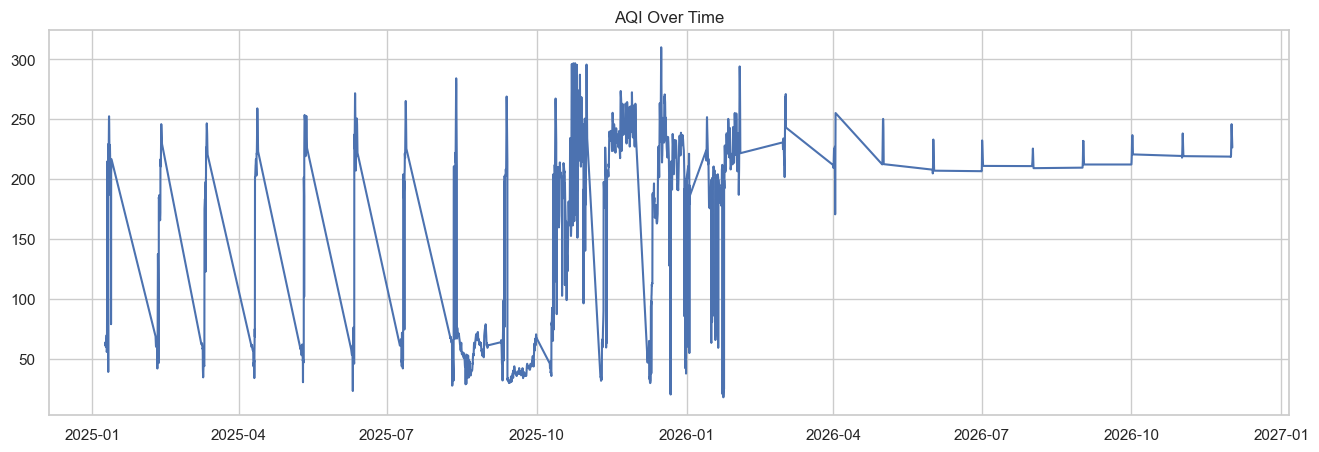

In [31]:
plt.figure(figsize=(16,5))

plt.plot(df["timestamp"], df["aqi"])
plt.title("AQI Over Time")
plt.show()


## Bivariate Analysis

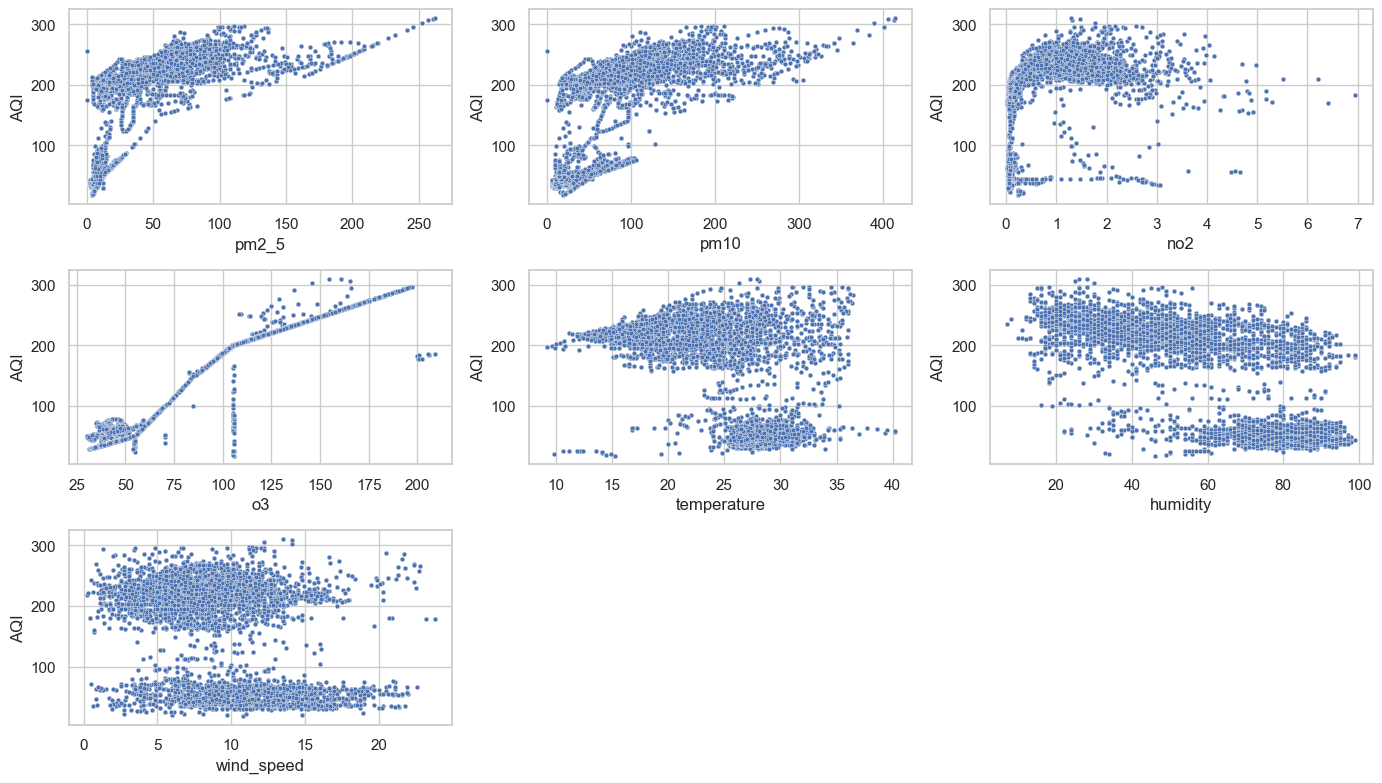

In [19]:
features = [
    "pm2_5",
    "pm10",
    "no2",
    "o3",
    "temperature",
    "humidity",
    "wind_speed"
]

plt.figure(figsize=(14,8))
for i, col in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=df[col], y=df["aqi"], s=12)
    plt.xlabel(col)
    plt.ylabel("AQI")

plt.tight_layout()
plt.show()


## Correlation Heatmap 

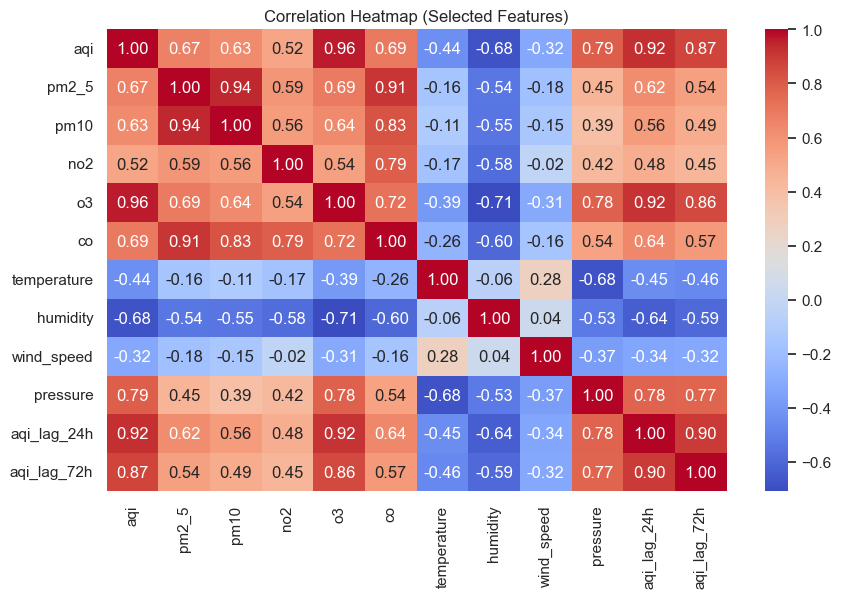

In [22]:
corr_features = [
    "aqi",
    "pm2_5",
    "pm10",
    "no2",
    "o3",
    "co",
    "temperature",
    "humidity",
    "wind_speed",
    "pressure",
    "aqi_lag_24h",
    "aqi_lag_72h"
]

plt.figure(figsize=(10,6))
sns.heatmap(
    df[corr_features].corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)
plt.title("Correlation Heatmap (Selected Features)")
plt.show()


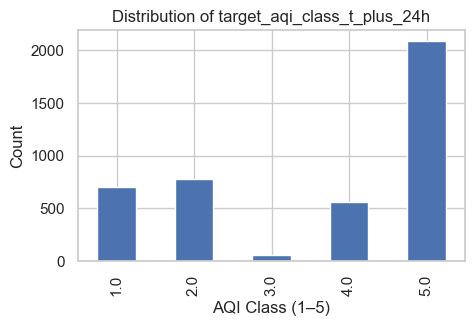

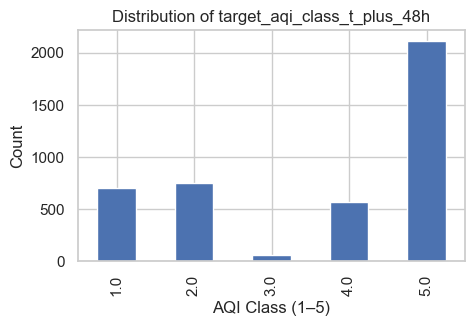

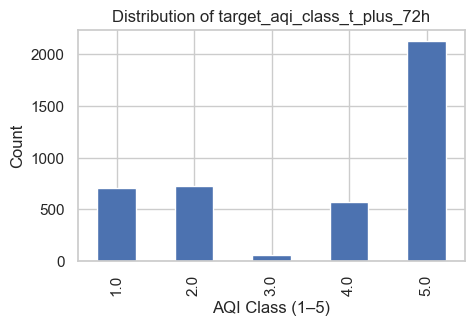

In [26]:

for t in targets:
    plt.figure(figsize=(5,3))
    df[t].value_counts().sort_index().plot(kind="bar")
    plt.title(f"Distribution of {t}")
    plt.xlabel("AQI Class (1–5)")
    plt.ylabel("Count")
    plt.show()
